In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import seaborn as sns
pd.set_option('display.max_rows', 999)
pd.options.mode.chained_assignment = None  # default='warn'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# What is the score based on? 

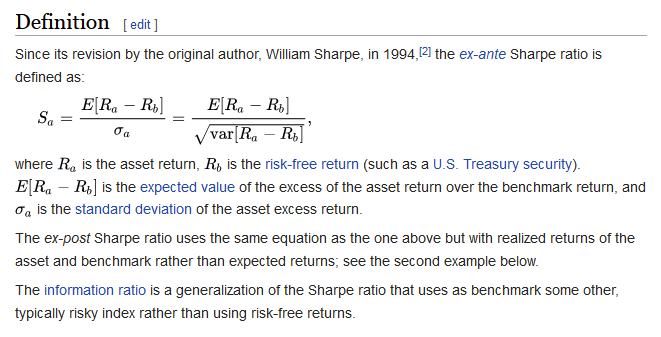

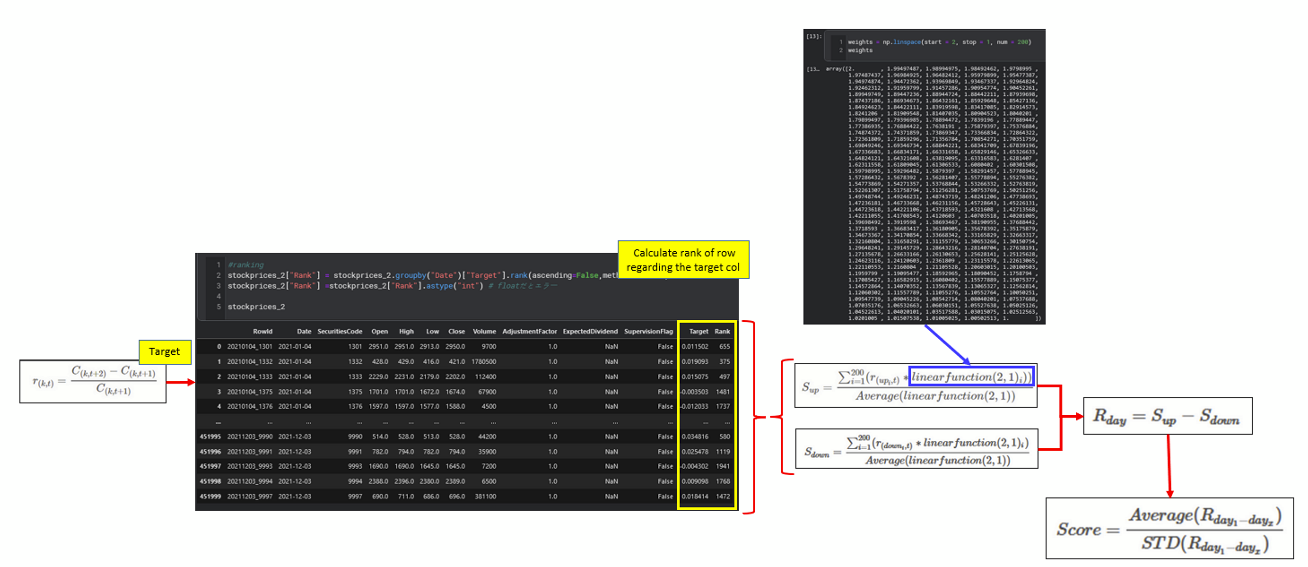

# Data Description

## We do have: 

1) Example test-files: options, financials,trades, stock_prices, secondary stock prices, sample_submission <br>
2) Train files: options, financials,trades, stock_prices, secondary stock prices <br>
3) supplemental files: options, financials,trades, stock_prices, secondary stock prices<br>

and spec_files describing the data:

(for further information about general topics / definition etc, the page of the jpx could give some valuable insights https://www.jpx.co.jp/english/)

In [ ]:
link_dict = {"stock_fin_spec" : "/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_fin_spec.csv",
"trades_spec" : "/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/trades_spec.csv",
"stock_price_spec" : "/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_price_spec.csv",
"options_spec" : "/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/options_spec.csv",
"stock_list_spec" : "/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_list_spec.csv"}

col_df = pd.DataFrame(columns = ["df_name","col_name"])

for name, link in zip(link_dict.keys(), link_dict.values()): 
    
    df_tmp = pd.read_csv(link)
    
    for row in df_tmp.iterrows(): 
        input = pd.DataFrame({"df_name": name, "col_name" : row[1]["Column"]}, index=[0])
        
        if len(col_df)==0:
            col_df = input.copy()
        else:
            col_df = pd.concat([col_df, input], axis = 0)
            
col_df = col_df.reset_index(drop = True)

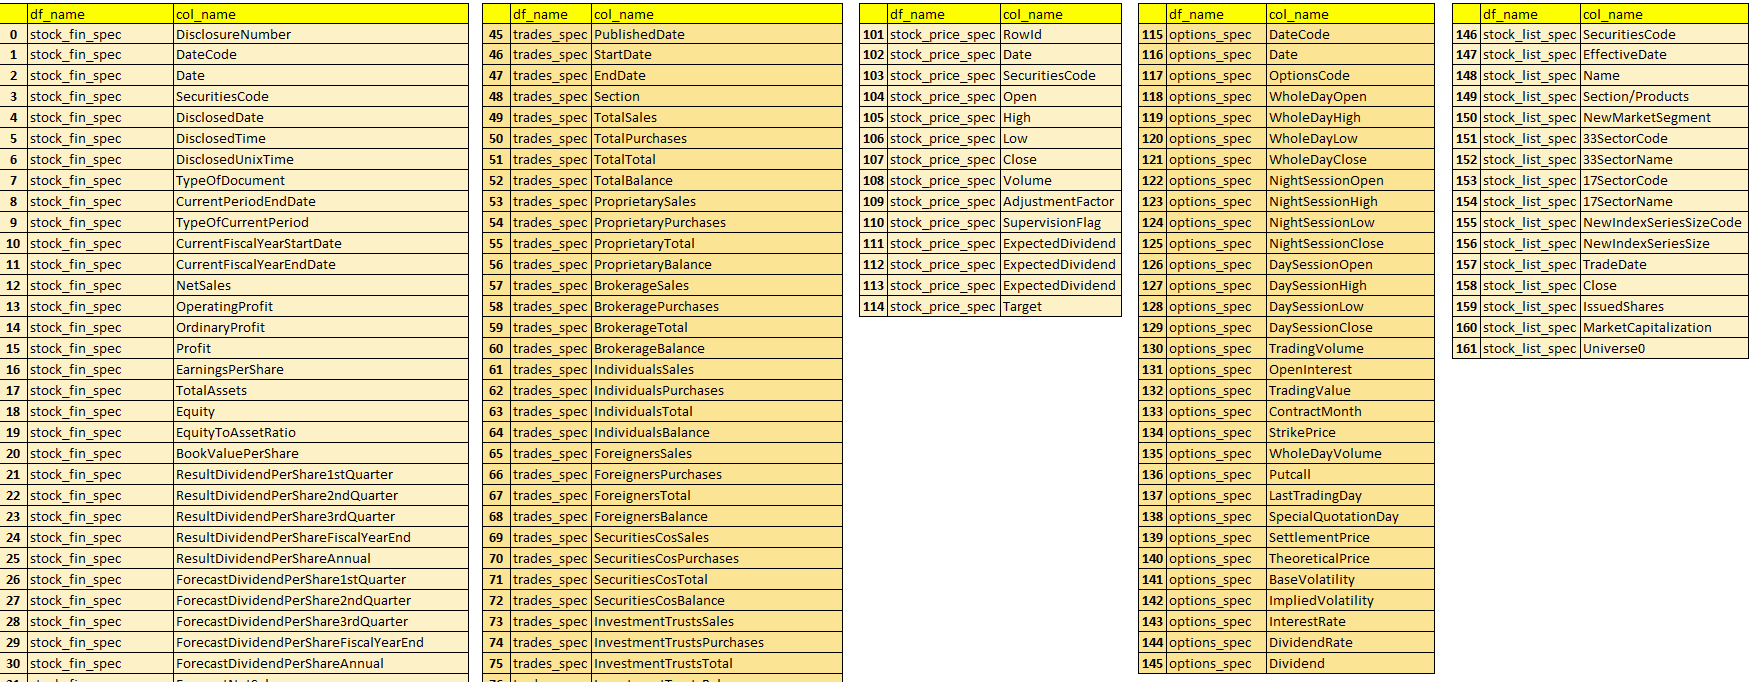

In [ ]:
#Further descriptions for the respective features in the dataframes

def print_descr(df_tmp, name):
    
    print(f"\n------------------- General description {name}-------------------\n")

    for row in df_tmp.iterrows():

        print("Column_name: {}".format(row[1]["Column"]))
        print("Sample value: {}".format(row[1]["Sample value"]))
        print("Type: {}".format(row[1]["Type"]))
        print("Remarks: {}".format(row[1]["Remarks"]))
        print("----------------\n")

for name, link in zip(link_dict.keys(), link_dict.values()): 
    
    df_tmp = pd.read_csv(link)
    print_descr(df_tmp, name) 
    
    print("\n\n\n-------------------###################################################################-------------------\n\n\n")

# Load the data

In [ ]:
sub_ex_test = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv")
options_ex_test = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv")
fin_ex_test = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv")
sec_sprice_ex_test = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv")
trades_ex_test = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv")
sprice_ex_test = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv")

In [ ]:
options_train = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/options.csv")
fin_train = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv")
sec_sprice_train = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/secondary_stock_prices.csv")
trades_train = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/trades.csv")
sprice_train = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv")

In [ ]:
options_supp = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/options.csv")
fin_supp = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/financials.csv")
sec_sprice_supp = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/secondary_stock_prices.csv")
trades_supp = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/trades.csv")
sprice_supp = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv")

In [ ]:
stock_list = pd.read_csv(r"/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv")

# Submission format

In [ ]:
sub_ex_test

In [ ]:
len(sub_ex_test["SecuritiesCode"].unique())

In [ ]:
sub_ex_test["Date"].value_counts().sort_index()

# Stockprices (includes Target)

In [ ]:
def describe_stockprices(df, name):
        print(f"-----------{name}-----------\n")
        print(f"Date Range from {df['Date'].min()} to {df['Date'].max()}")
        
        df_grouped = df.groupby("SecuritiesCode")["Date"].count().sort_values(ascending = False).value_counts().sort_index(ascending = False)
        print("There are {} different equities".format(len(df["SecuritiesCode"].unique())))
        print("These 2.000 different equities have {} different amounts of measurements".format(len(df_grouped.index)))
        print("There are {} equities which have a time horizon of {} time steps which is the largest time horizon".format(df_grouped.max(), df_grouped.idxmax()))
        print("There are {} equities which have a time horizon of {} time steps which is the smallest time horizon".format(df_grouped.min(), df_grouped.index.min()))

In [ ]:
for name, df in zip(["train", "test", "supplemental"],[sprice_train, sprice_ex_test,sprice_supp]):

    describe_stockprices(df, name)
    print("\n")

### Check for Null Values

In [ ]:
fig, sub = plt.subplots(1,1, figsize = (16,8))

sns.heatmap(sprice_train.set_index("Date", drop = True).isnull())
sub.set_title("Train");

In [ ]:
fig, sub = plt.subplots(1,1, figsize = (16,8))

sns.heatmap(sprice_ex_test.set_index("Date", drop = True).isnull())
sub.set_title("Test");

In [ ]:
fig, sub = plt.subplots(1,1, figsize = (16,8))

sns.heatmap(sprice_supp.set_index("Date", drop = True).isnull())
sub.set_title("Test");

* [Securities Code], [Open], [High], [Low], [close], [volume], [adjustmentfactor], [supervisionFlag], [Target] seem to be quite complete
* for  [Expected dividend] most of the values are missing
* One outlier (around 2021-10-26) where data is missing

### Check target distribution

In [ ]:
def plot_target_info(df, name):

    mean_val = np.round(df["Target"].mean(),2)
    median_val = np.round(df["Target"].median(),2)
    std_val = np.round(df["Target"].std(),2)
    min_val = np.round(df["Target"].min(),2)
    max_val = np.round(df["Target"].max(),2)

    fig, sub = plt.subplots(1,1,figsize = (16,8))
    sub.hist(df["Target"], bins = 100, edgecolor = "black")
    sub.grid()
    sub.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
    sub.legend()
    sub.set_title(f"{name}")

    txt = "Mean: {} \nMedian: {} \nStd: {} \nmin: {} \nmax: {}".format(mean_val, median_val, std_val, min_val, max_val)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    sub.text(0.02, 0.95, txt, fontsize = 14, transform=sub.transAxes, verticalalignment = "top", bbox = props);

In [ ]:
plot_target_info(sprice_train, "train")

In [ ]:
plot_target_info(sprice_supp, "Supplemental")

### Development of target over time

In [ ]:
def plot_target_development(df, name, grouped_by = None):
    
    if grouped_by is None:
        
        fig, subs = plt.subplots(1,2, figsize = (25,4))
        
        df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

        mean_CR = df.groupby("Date")["Target"].mean()
        mean_CR_cumsum = df.groupby("Date")["Target"].mean().cumsum()

        subs[0].plot(mean_CR.index, mean_CR)
        subs[1].plot(mean_CR_cumsum.index, mean_CR_cumsum)

        subs[0].set_title(f"Target mean by date, {name}", fontdict = {"size":14})
        subs[0].set_ylabel("Target value", fontdict = {"size":14}, labelpad = 12)

        subs[1].set_title(f"Target mean cumulated by date, {name}", fontdict = {"size":14})

        subs[0].grid()
        subs[1].grid()
        fig.tight_layout()
    else:
        
        fig, subs = plt.subplots(1,2, figsize = (35,8))
        
        df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
        
        grouped_mean_CR = df.groupby([grouped_by,"Date"])["Target"].mean().reset_index()
        grouped_mean_CR = grouped_mean_CR.set_index("Date")
        
        for group in grouped_mean_CR[grouped_by].unique():
            
            df_tmp_mean_CR = grouped_mean_CR[grouped_mean_CR[grouped_by]==group]
            df_tmp_mean_CR["Target_cumsum"] = df_tmp_mean_CR["Target"].cumsum()
            
            subs[0].plot(df_tmp_mean_CR.index, df_tmp_mean_CR["Target"], label = group)
            subs[1].plot(df_tmp_mean_CR.index, df_tmp_mean_CR["Target_cumsum"], label = group)

            subs[0].set_title(f"Target mean by date, {name}", fontdict = {"size":14})
            subs[0].set_ylabel("Target value", fontdict = {"size":14}, labelpad = 12)

            subs[1].set_title(f"Target mean cumulated by date, {name}", fontdict = {"size":14})

            subs[0].grid()
            subs[1].grid()
            
            plt.legend(loc="upper left")
            fig.tight_layout()

In [ ]:
plot_target_development(sprice_train, "train")

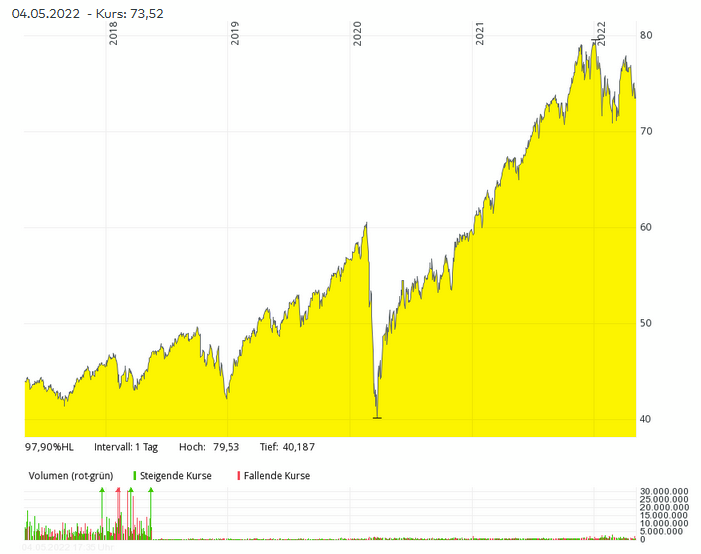

* seems to match the MSCI world developments

In [ ]:
plot_target_development(sprice_supp, "Supplemental")

### Stock target distributions (not time dependent)

In [ ]:
stock_list.head()
sprice_train = pd.merge(left = sprice_train, right = stock_list, left_on = "SecuritiesCode", right_on = "SecuritiesCode", how = "left")
sprice_train = sprice_train.rename({"Close_x":"Close"}, axis = 1).drop("Close_y", axis = 1)

In [ ]:
def group_dep_hist(df, grouping_attribute):
    
    cnt = len(df.groupby(grouping_attribute).groups.keys())
    delete_flag = False
    
    if cnt%3 != 0:
        
        sub_cnt = cnt // 3+1
        to_delete = sub_cnt*3 - cnt
        delete_flag = True
        
    else:
        sub_cnt = cnt//3
        
    fig, sub = plt.subplots(sub_cnt,3,figsize=(16,4*sub_cnt))
    
    for group, subplot in zip(df.groupby(grouping_attribute).groups.keys(), sub.ravel()):

        df_tmp = df.groupby(grouping_attribute).get_group(group)["Target"]
        
        subplot.hist(df_tmp, bins = 100, edgecolor = "black", align = 'mid')
        subplot.grid()
        subplot.set_title(f"{group}")  
        
        mean_val = np.round(df_tmp.mean(),2)
        std_val = np.round(df_tmp.std(),2)
        min_val = np.round(df_tmp.min(),2)
        max_val = np.round(df_tmp.max(),2)
        
        txt = "Mean: {} \nStd: {} \nmin: {} \nmax: {}".format(mean_val, std_val, min_val, max_val)
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        subplot.text(0.02, 0.95, txt, fontsize = 14, transform=subplot.transAxes, verticalalignment = "top", bbox = props);
    
    if delete_flag:
        for subs in sub.ravel()[-to_delete:]:
            fig.delaxes(subs)
    
    fig.tight_layout()

In [ ]:
group_dep_hist(sprice_train, "NewMarketSegment")

In [ ]:
group_dep_hist(sprice_train, "17SectorName")

Short notes:

* there seem to be differences in <b> <font color = "green"> STD </font> </b> of the change rate (target) depending from which market segment the companies coming from (e.g. Growth Market companies have a bigger std than Prime / Standard market companies)
* there seem to be just minor differences in <b> <font color = "green"> STD </font> </b> of the change rate (target) depending from which industrial sectors the companies coming from
<br><br>
* within the above mentioned groups we can observe different <b> <font color = "green"> min / max values  </b> </font>

In [ ]:
market_cap = pd.DataFrame(sprice_train.groupby("SecuritiesCode")["MarketCapitalization"].max().sort_values(ascending = False))
market_cap["group_market_cap"] = pd.qcut(sprice_train.groupby("SecuritiesCode")["MarketCapitalization"].max().sort_values(ascending = False), q = 10, labels = [f"group_{group}" for group in range(10)])
market_cap = pd.merge(left = market_cap, right = stock_list[["SecuritiesCode","Name"]], left_on = "SecuritiesCode", right_on = "SecuritiesCode", how ="left")
market_cap.head()

In [ ]:
sprice_train = pd.merge(sprice_train, market_cap, left_on = "SecuritiesCode", right_on = "SecuritiesCode", how = "left").rename({"MarketCapitalization_x":"MarketCapitalization"}, axis = 1).drop("MarketCapitalization_y", axis = 1)

In [ ]:
#Group 9 highest market capitalization, 0 lowest market capitalization
group_dep_hist(sprice_train, "group_market_cap")

### Stock development

In [ ]:
high_price = sprice_train.groupby("SecuritiesCode")["Close"].mean().sort_values(ascending=False).head(5).index
low_price = sprice_train.groupby("SecuritiesCode")["Close"].mean().sort_values(ascending=False).tail(5).index

close_price_high = sprice_train[sprice_train["SecuritiesCode"].isin(high_price)].groupby(["SecuritiesCode","Date"])["Close"].mean().reset_index()
close_price_low = sprice_train[sprice_train["SecuritiesCode"].isin(low_price)].groupby(["SecuritiesCode","Date"])["Close"].mean().reset_index()

###########################################

fig, sub = plt.subplots(1,2,figsize = (25,8))

for sec_code in close_price_high["SecuritiesCode"].unique():
    
    df_tmp = close_price_high[close_price_high["SecuritiesCode"]==sec_code]
    sub[0].plot(df_tmp["Date"], np.log1p(df_tmp["Close"]))
    
sub[0].grid()
sub[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
sub[0].set_title("Close Price (high priced stocks)", fontdict = {"size":14})
sub[0].set_ylabel("log Price in EUR", fontdict = {"size":14}, labelpad = 12)


###########################################

for sec_code in close_price_low["SecuritiesCode"].unique():
    
    df_tmp = close_price_low[close_price_low["SecuritiesCode"]==sec_code]
    sub[1].plot(df_tmp["Date"], np.log1p(df_tmp["Close"]))
    
sub[1].grid()
sub[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
sub[1].set_title("Close Price (Low priced stocks)", fontdict = {"size":14})
sub[1].set_ylabel("log Price in EUR", fontdict = {"size":14}, labelpad = 12)

fig.tight_layout()

* we can see really well the different time horizons
* there are some stocks which are not consistent (this means the data is not available for every day)

In [ ]:
plot_target_development(sprice_train, "train" ,"17SectorName")

In [ ]:
plot_target_development(sprice_train, "train" ,"NewMarketSegment")

In [ ]:
plot_target_development(sprice_train, "train" ,"group_market_cap")